# 準二次元不等流計算1/4：不等流計算の基礎


- [LICENSE](https://raw.githubusercontent.com/computational-sediment-hyd/NonUniformFlowModelUsingPython/main/LICENSE)

---

## 基礎式

矩形近似した断面の不等流計算の基礎式はベルヌーイの式とマニング則より次式となる。

$$
\begin{align}
& \dfrac{d}{dx}\left( \frac{q^2}{2gh^2} + h + z_b \right) = -i_e \\
& q = \dfrac{1}{n}i_e^{1/2}h^{5/3} \\
\end{align}
$$

ここに、$q$:単位幅流量、$h$：水深、$z_b$：河床高、$i_e$：エネルギー勾配、$n$：マニングの粗度係数、$g$：重力加速度とする。

---

等流水深$h_0$、限界水深$h_c$は次式となる。

$$
\begin{align}
h_0&=\left(\dfrac{q^2n^2}{i_b}\right)^{3/10} \\
h_c&=\left(\dfrac{q^2}{g}\right)^{1/3}
\end{align}
$$

ここに、$i_b = - \dfrac{d z_b}{dx}$：河床勾配とする。

---

## 離散化

ベルヌーイの式とマニング則を連立させて離散化すると次式となる。
なお、$i$:上流側、$i-1$:下流側とする。

$$
\begin{align}
\left(\frac{q^2}{2gh^2_i} + h_i + {z_b}_i \right) 
-\left( \frac{q^2}{2gh_{i-1}^2} + h_{i-1} + {z_b}_{i-1} \right) 
= \dfrac{1}{2}\left(\dfrac{q^2n^2}{h_i^{10/3}} + \dfrac{q^2n^2}{h_{i-1}^{10/3}}\right)\Delta x
\end{align}
$$

エネルギー勾配は上下流断面の平均値を用いている。

常流の場合、下流から逐次計算を行なうため未知数は$h_i$のみとなる。

---

## 水面形方程式

前出のベルヌーイの式を変形して次の水面形方程式（水深の微分に関する方程式）を得る。

$$
\begin{align}
 \dfrac{d}{dx}\left( \dfrac{q^2}{2gh^2} + h + z_b \right) &= -i_e \\
- \dfrac{q^2}{gh^3}\dfrac{dh}{dx} + \dfrac{dh}{dx} + \dfrac{d z_b}{dx} &= -i_e \\
\dfrac{dh}{dx} &= \dfrac{i_b -i_e }{ 1 - \dfrac{q^2}{gh^3}}  \\
 &= \dfrac{i_b -i_e }{ 1 - {Fr}^2} 
\end{align}
$$
ここに、$Fr = \dfrac{v}{\sqrt{gh}} = \dfrac{q}{\sqrt{gh^3}}$：フルード数とする。

---

水面形方程式の分子=0は$\dfrac{dh}{dx}=0$のため等流状態を示し、前出の等流水深が得られる（等流水深の定義）。
また、分母=0から限界水深が得られ（限界水深の定義）、$\dfrac{dh}{dx}=\infty$のため水面形が得られない。この地点は支配断面と呼ばれる。

上式を$h_0,h_c$を用いて展開すると次式が得られる。（式展開は例えば[ここ](https://sites.google.com/view/senmitsu/%E6%B0%B4%E5%B7%A5%E7%B3%BB/6-6-%E9%96%8B%E6%B0%B4%E8%B7%AF%E3%81%AE%E4%B8%8D%E7%AD%89%E6%B5%81)を参照）

$$
\begin{align}
\dfrac{dh}{dx} &= i_b \dfrac{1-\left(\dfrac{h_0}{h}\right)^{10/3}}{1-\left(\dfrac{h_c}{h}\right)^3 }
\end{align}
$$

不等流計算を行なう上で本式より以下を理解しておく必要がある。

---


### 水面形の追跡方向
 - $Fr \lt 1$または$h_c \lt h$または$v\lt\sqrt{gh}$は、常流
 - $Fr \gt 1$または$h_c \gt h$または$v\gt\sqrt{gh}$は、射流
 
 と定義される。
 $\sqrt{gh}$は（微小振幅波理論による水面波の）波速であり、射流は$v\gt\sqrt{gh}$のため水面変化が下流のみに影響するが、常流では上流にも影響をすることが示されている。
そのため、不等流計算の水面形の追跡方向は、常流は下流から上流、射流は上流から下流となる。

---

### 水面形の概形

$h,h_0,h_c$の関係より$\dfrac{dh}{dx}$の符号が決まるため水面形の概形が把握できる。教科書にみられる緩勾配水路（M水路、$h_0 \gt h_c$）や急勾配水路（S水路、$h_0 \lt h_c$）などの水面形はこの考え方による描くことができる。


![A](https://computational-sediment-hyd.github.io/NonUniformFlowModelUsingPython/01_NonUniformFlow01/ref/fig01.jpg)

出典：椿東一郎 水理学1 pp.151

---

## 数値計算方法

未知数$h_i$は直接計算できなため反復法によって近似解を求める。ここでは、ニュートン法を用いた。（参考：[ニュートン法とは](https://ja.wikipedia.org/wiki/%E3%83%8B%E3%83%A5%E3%83%BC%E3%83%88%E3%83%B3%E6%B3%95)）

ニュートン法のアルゴリズムに沿うと、計算式は次のとおりとなる。

$$
\begin{align}
f &= \left(\frac{q^2}{2gh^2_i} + h_i + {z_b}_i \right) 
-\left( \frac{q^2}{2gh_{i-1}^2} + h_{i-1} + {z_b}_{i-1} \right) 
 - \dfrac{1}{2}\left(\dfrac{q^2n^2}{h_i^{10/3}} + \dfrac{q^2n^2}{h_{i-1}^{10/3}}\right)\Delta x \\
\dfrac{df}{dh_i} &= -\frac{q^2}{gh^3_i} + 1 
+ \dfrac{5}{3}\dfrac{q^2n^2}{h_i^{13/3}} \Delta x
\end{align}
$$

$$
\begin{align}
h^{new}_i &= h_i - \dfrac{f}{\dfrac{df}{dh_i}}
% f &= \left(\frac{q^2}{2gh^2_i} + h_i + {z_b}_i \right) 
% -\left( \frac{q^2}{2gh_{i-1}^2} + h_{i-1} + {z_b}_{i-1} \right) 
%  + \dfrac{1}{2}\left(\dfrac{q^2n^2}{h_i^{10/3}} + \dfrac{q^2n^2}{h_{i-1}^{10/3}}\right)\Delta x \\
% \dfrac{df}{dh_i} &= -\frac{q^2}{gh^3_i} + 1 
% - \dfrac{5}{3}\dfrac{q^2n^2}{h_i^{13/3}} \Delta x
\end{align}
$$

---

## サンプルコード

単位幅流量0.5$\mathrm{m^3/s/m}$、マニングの粗度係数0.02、河床勾配1/500、水路延長50$\mathrm{m}$の矩形水路を対象に下流端水位を限界水深としたときの水面形を計算せよ。なお、$\Delta x$は0.1$\mathrm{m}$とする。

---

In [1]:
import numpy as np

q = 0.5
n = 0.02
ib = 1/500
g = 9.8
dx = 0.1

h0 = (q**2*n**2/ib)**0.3 #等流水深
hc = (q**2/g)**(1/3) # 限界水深

L = np.arange(0,50.01,dx) #追加距離の配列
zb = L*ib #河床高の配列
h = np.zeros_like(L) #水深の配列

h[0] = hc #下流端条件
for i in range(1,len(h)):
    h[i] = h[i-1] #収束計算の初期値：一つ下流側の断面の水深
    f = 1.0 #仮値
    dfdh = 1.0 #仮値
    while np.abs(f/dfdh) > 10**(-8): # 反復計算の収束条件
        f = q**2/2.0/g/h[i]**2 + h[i] + zb[i] \
          -(q**2/2.0/g/h[i-1]**2 + h[i-1] + zb[i-1]) \
          - 0.5*(q**2*n**2/h[i]**(10/3) + q**2*n**2/h[i-1]**(10/3))*dx
        dfdh = -q**2/g/h[i]**3 + 1 + 5/3*q**2*n**2/h[i]**(13/3)*dx
        h[i] -= f/dfdh

---

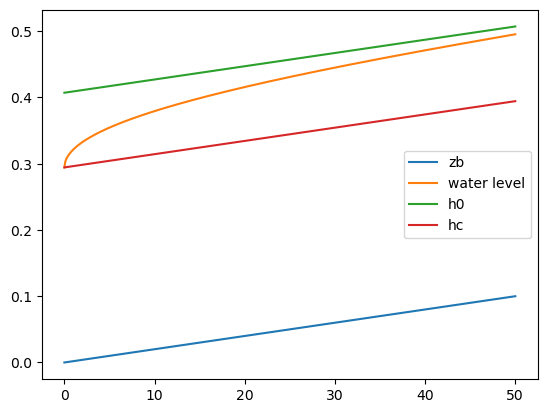

In [2]:
import matplotlib.pyplot as plt

plt.plot(L,zb, label='zb')
plt.plot(L,h+zb, label='water level')
plt.plot(L,zb+h0, label='h0')
plt.plot(L,zb+hc, label='hc')
plt.legend()              # 凡例の表示
plt.show()                # 描画

---

## 補足：常流、射流混在流れの数値計算方法

実河川では射流が出現する範囲は局所的であり、射流の水面形が求めれることはそう多くない。

常流、射流の混在流れの計算方法については例えば以下が参考となる。

 - [石川ら：常流・射流が混在する区間の不等流計算法](https://jglobal.jst.go.jp/detail?JGLOBAL_ID=200902051802853683)(元論文が必要な方はDM下さい)
 - [岡部ら：常流・射流の遷移を伴う不等流の数値計算法について](https://www.jstage.jst.go.jp/article/prohe1990/36/0/36_0_337/_article/-char/ja/)
 - [HEC-RAS River Analysis System - Hydraulic Reference Manual:Mixed Flow Regime Calculations](http://drm.cenn.org/Trainings/Flood%20Modelling/Other%20Documents/Software/HECRAS/manuals/HEC-RAS_4.1_Reference_Manual.pdf#page=98)（リンク切れの場合DM下さい）

かなり煩雑な計算が必要な上、わずかな条件の差で跳水位置が変わるなど実務的に取り扱いが難しい。
また、射流部では$\Delta x$を十分に小さくとることが必要となる。

---

実務では、常流区間の中で一部が射流であれば限界水深に置き換えて計算する場合が多い。また、射流部のフルード数が大きい場合は、次に示すようなリミッターを設定することにより水面形を滑らかにすることもある。

 - [Fread et al.:An LPI Numerical Implicit Solution for Unsteady Mixed-Flow Simulation](https://cedb.asce.org/CEDBsearch/record.jsp?dockey=0099470)(元論文が必要な方はDM下さい)
 - [MIKE 11 Reference Manua:Suppression of convective acceleration term](https://manuals.mikepoweredbydhi.help/2021/Water_Resources/Mike_11_ref.pdf#page=171)（リンク切れの場合DM下さい）

計算負荷が大きくても問題がない場合は不定流計算による定常解により水面形を与える方法も考えられる。

常流、射流混在流れの水面形は計算手法によって大きく異なってしまうため、計算の際は十分に検討することが必要である。
